In [18]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
import os, sys, re, pytz
from tqdm import tqdm
from datetime import datetime

In [33]:
# grab the file paths from disk. Or can copy paths from github.
fileList =[]
os.chdir('/home/james/Maths/dataWrangling23/DWproject/dataSets/jan22All/')
files = os.listdir()
[fileList.append(file) for file in files ]
fileList

['jan22Allp3.csv',
 'jan22Allp5.csv',
 'jan22Allp2.csv',
 'jan22Allp1.csv',
 'jan22Allp4.csv',
 'jan22Allp6.csv',
 'jan22Allp7.csv']

In [3]:
# Function to group the tweets into bin of size time
# helps to reduce file size for the data set.
def groupPerTimeTweets(file, time):
    df = pd.read_csv(file)
    df = df[['created_at', 'lang']]
    df['x']=1
    df['created_at']= pd.to_datetime(df['created_at'])
    df = df.groupby(pd.Grouper(key='created_at', freq=time)).sum()
    return df
    

Text(0, 0.5, 'Number of tweets.')

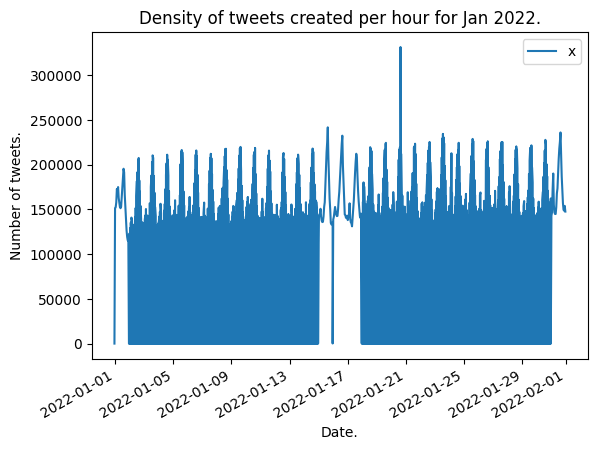

In [4]:
# Process january 2022 data set for time=60min and plot.
tweetsPerHour =[]
[tweetsPerHour.append(groupPerTimeTweets(file, '60min')) for file in fileList]
dfPerHour = pd.concat(tweetsPerHour)
tweetsPerHour = None
gc.collect()
tweetsPlot = dfPerHour.plot()
tweetsPlot.set_title("Density of tweets created per hour for Jan 2022.")
tweetsPlot.set_xlabel("Date.")
tweetsPlot.set_ylabel("Number of tweets.")


In [6]:
# Save plot to disk.
tweetsPlot.figure.savefig('/home/james/Maths/dataWrangling23/DWproject/figures/JanAllraw.jpeg')

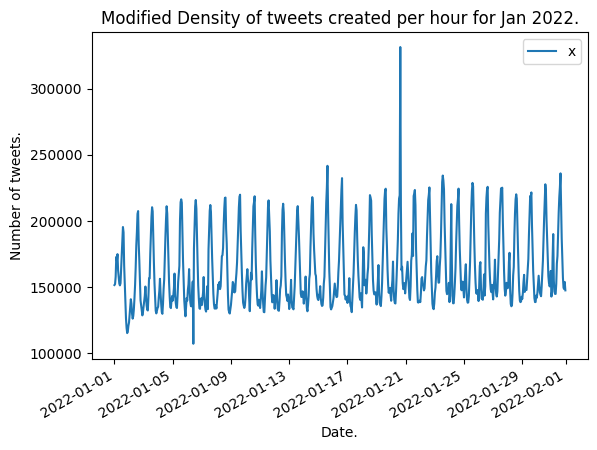

In [9]:
# Remove lower outliers, namely <10,000.
# plot and save.
tweetsAllmod =dfPerHour[dfPerHour.x >100000]
tweetsPlotmod =tweetsAllmod.plot()
tweetsPlotmod.set_title("Modified Density of tweets created per hour for Jan 2022.")
tweetsPlotmod.set_xlabel("Date.")
tweetsPlotmod.set_ylabel("Number of tweets.")
tweetsPlotmod.figure.savefig('/home/james/Maths/dataWrangling23/DWproject/figures/JanAllmod.jpeg')

In [40]:
# get a specified lang and time bin
def getLangEqualsTime(file, lang, time):
    df = pd.read_csv(file)
    df = df[['created_at', 'lang']]
    df = df[df.lang == lang]
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['x']=1
    df = df.groupby(pd.Grouper(key='created_at', freq=time)).sum()
    return df

In [41]:
# Process jan 22 for lang='nl' and  time='60min'
dutchTweets = []
[ dutchTweets.append(getLangEqualsTime(file,'nl','60min')) for file in fileList ]
dutchTweets = pd.concat( dutchTweets )

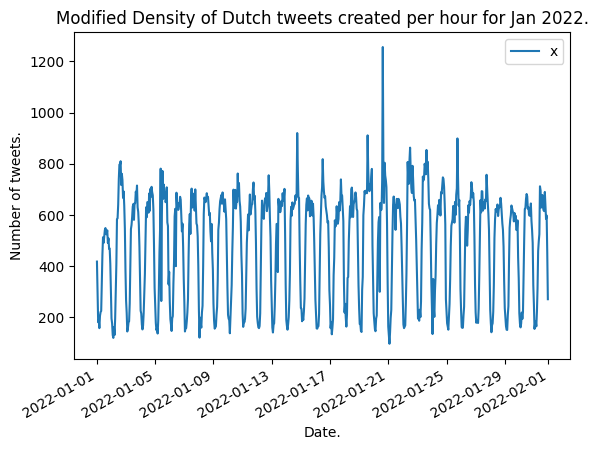

In [46]:
# remove outliers, plot and save to disk
dutchTweetsPlot=dutchTweets[dutchTweets['x']>50].plot()
dutchTweetsPlot.set_title("Modified Density of Dutch tweets created per hour for Jan 2022.")
dutchTweetsPlot.set_xlabel("Date.")
dutchTweetsPlot.set_ylabel("Number of tweets.")
dutchTweetsPlot.figure.savefig('/home/james/Maths/dataWrangling23/DWproject/figures/JanNLmod.jpeg')

In [2]:
# get a specified lang and time bin, time start and stop.
def getBounded(file, lang, time, t1,t2):
    df = pd.read_csv(file)
    df = df[['created_at', 'lang']]
    df = df[df.lang == lang]
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['x']=1
    df = df.groupby(pd.Grouper(key='created_at', freq=time)).sum()
    df =df[(df.index >t1)&(df.index<t2)]
    return df

In [64]:
# Process jan 22 for lang='nl' and  time='2min', 14th 15th.
fileNL='/home/james/Maths/dataWrangling23/DWproject/dataSets/jan22NL.csv'
dutchTweets14 = []
t= ['2022-01-14', '2022-01-15']
dutchTweets14 =getBounded(fileNL,'nl','2min',t[0],t[1])

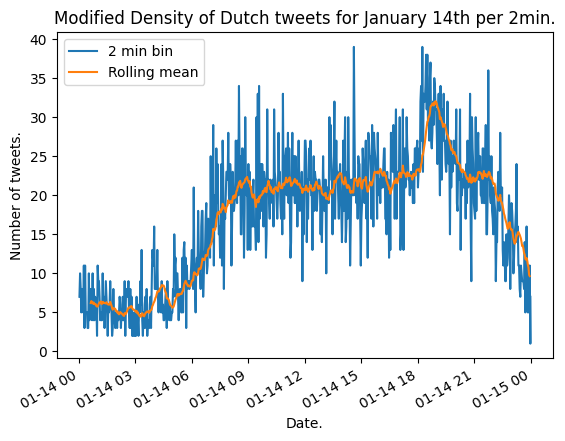

In [106]:
# remove outliers, plot and save to disk
ax =dutchTweets14[dutchTweets14['x']>0].plot()
dutchTweets14Plot=dutchTweets14[dutchTweets14['x']>0].rolling(20).mean().plot(ax=ax)
dutchTweets14Plot.legend(['2 min bin', 'Rolling mean'])
dutchTweets14Plot.set_title("Modified Density of Dutch tweets for January 14th per 2min.")
dutchTweets14Plot.set_xlabel("Date.")
dutchTweets14Plot.set_ylabel("Number of tweets.")
dutchTweets14Plot.figure.savefig('/home/james/Maths/dataWrangling23/DWproject/figures/JanNLD14roll.jpeg')

In [5]:
def filterLang(file, lang):
    df = pd.read_csv(file)
    df = df[['created_at', 'lang']]
    df = df[df.lang == lang]
    return df

In [173]:
#used to grab only dutch tweets and then save to disk, so can be skipped.
janNL =[]
[janNL.append(filterLang(file,'nl')) for file in fileList ]
janNL= pd.concat(janNL, ignore_index=True)
janNL.to_csv('/home/james/Maths/dataWrangling23/DWproject/dataSets/jan22NL.csv')

In [34]:
# get a specified lang and time bin, time start and stop.
def getBoundedMod(file, time, t1,t2):
    df = pd.read_csv(file)
    df = df[['created_at', 'lang']]
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['x']=1
    df = df.groupby(pd.Grouper(key='created_at', freq=time)).sum()
    df =df[(df.index >t1)&(df.index<t2)]
    return df

In [35]:
# Jan per day dutch tweets, interval= 2mins.
fileNL = '/home/james/Maths/dataWrangling23/DWproject/dataSets/jan22NL.csv'
tweetNLPerDay =[]

tjan=pd.to_datetime(pd.date_range(start='2022-01-01', end='2022-01-31', freq='D'))
tjanstr=[str(x) for x in tjan]

for i in tqdm(range(len(tjanstr)-1), ncols=90):
    tweetNLPerDay.append(getBoundedMod(fileNL,'2min',tjanstr[i],tjanstr[i+1]))


100%|█████████████████████████████████████████████████████| 30/30 [16:48<00:00, 33.60s/it]


In [36]:
# get mean and SD for 2min intervals for the whole month.
dic={}
for i in range(len(tweetNLPerDay)):
    dic[tjanstr[i]]=tweetNLPerDay[i]['x'].tolist()

index = pd.to_datetime(pd.date_range(start='2022-01-01', end='2022-01-02', freq='2min'))
dutch2minJan = pd.DataFrame(data=dic, index=index[1:720])
dutch2minJan['mean']=dutch2minJan.mean(axis=1,numeric_only=True)
dutch2minJan['std']=dutch2minJan.std(axis=1,numeric_only=True)
dutch2minJan['mean_roll']=dutch2minJan['mean'].rolling(10).mean(numeric_only=True)
dutch2minJan['std_roll']=dutch2minJan['std'].rolling(10).std(numeric_only=True)
dutch2minJan

,2022-01-01 00:00:00,2022-01-02 00:00:00,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-07 00:00:00,2022-01-08 00:00:00,2022-01-09 00:00:00,2022-01-10 00:00:00,...,2022-01-25 00:00:00,2022-01-26 00:00:00,2022-01-27 00:00:00,2022-01-28 00:00:00,2022-01-29 00:00:00,2022-01-30 00:00:00,mean,std,mean_roll,std_roll
2022-01-01 00:02:00,21,8,6,11,12,12,15,4,10,15,...,5,7,9,15,5,10,10.300000,4.001250,NaN,NaN
2022-01-01 00:04:00,16,6,13,9,14,6,9,5,8,5,...,4,7,12,8,12,10,9.066667,3.434466,NaN,NaN
2022-01-01 00:06:00,15,8,8,5,10,4,12,5,6,6,...,5,12,15,4,9,4,8.100000,2.992769,NaN,NaN
2022-01-01 00:08:00,10,5,9,4,9,15,5,9,4,13,...,2,9,7,11,5,7,8.433333,3.007583,NaN,NaN
2022-01-01 00:10:00,4,6,6,11,10,6,10,10,10,7,...,6,6,9,7,8,6,8.666667,2.440401,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 23:50:00,4,10,15,6,14,5,12,14,13,17,...,5,12,8,11,12,3,9.966667,4.183167,10.403333,0.435993
2022-01-01 23:52:00,8,11,4,14,16,7,6,8,11,9,...,12,5,10,9,16,9,9.633333,2.983101,10.246667,0.415260
2022-01-01 23:54:00,10,16,11,10,10,12,11,11,10,7,...,7,10,8,8,16,4,9.733333,3.010353,10.126667,0.419553
2022-01-01 23:56:00,8,13,10,6,9,9,14,11,11,10,...,8,2,11,12,8,9,9.133333,3.343983,10.046667,0.412084


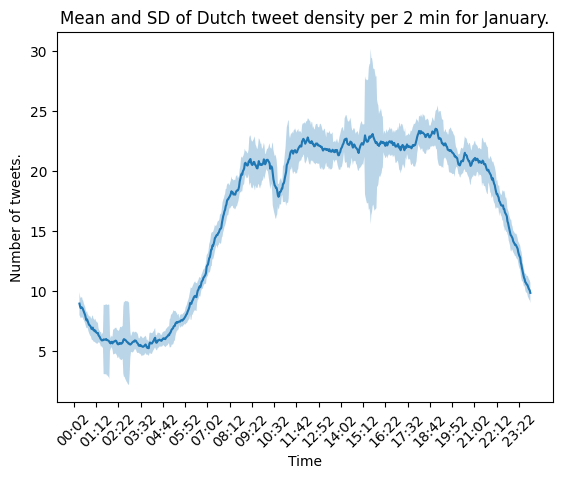

In [59]:
# create a plot of the mean and SD.
x = [ elem.strftime("%H:%M") for elem in dutch2minJan.index.tolist()]
plotMeanSD=plt.figure()
plt.plot(x, dutch2minJan['mean_roll'], label='rolling mean.')
plt.fill_between(x,dd1['mean_roll']-(2*dutch2minJan['std_roll']),dutch2minJan['mean_roll']+(2*dutch2minJan['std_roll']),alpha=.3)
plt.title("Mean and SD of Dutch tweet density per 2 min for January.")
plt.xlabel("Time")
plt.ylabel("Number of tweets.")
plt.xticks(x[::35], rotation=45)
plt.savefig('/home/james/Maths/dataWrangling23/DWproject/figures/JanNLdayfill.jpeg')

In [ ]:
## For report:
dutchPressCon = [
    (datetime(2022,1,14,19, 0, 0, 0, tzinfo=pytz.timezone('Europe/Amsterdam')), "1:Rules will stay in place."),
    (datetime(2022,1,25,19, 0, 0, 0, tzinfo=pytz.timezone('Europe/Amsterdam')), "2:Lifts lockdown.")
]

In [ ]:
#load all dutch tweets from file, group by 60mins
fileNL='/home/james/Maths/dataWrangling23/DWproject/dataSets/jan22NL.csv'
dutchTweetsAll60min = groupPerTimeTweets(fileNL, '60min')

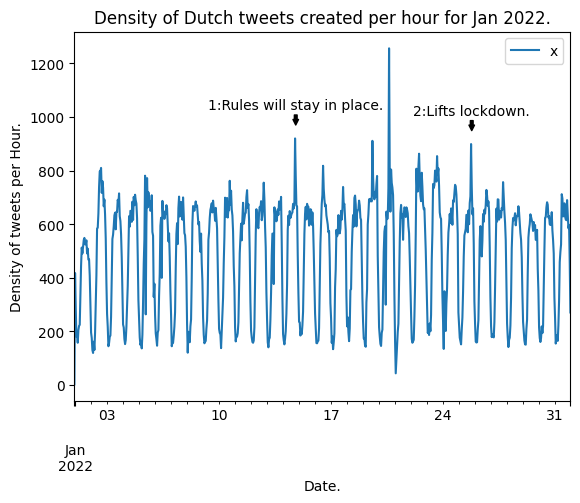

In [31]:
# Plot all dutch tweet 60mins, annotations
figNL60Anno   = plt.figure()
figNL60AnnoAX = figNL60Anno.add_subplot(1,1,1)
data = dutchTweetsAll60min[dutchTweetsAll60min['x']>0]
data.plot(ax=figNL60AnnoAX, style='-', label='Tweets')

for date, label in dutchPressCon:
    figNL60AnnoAX.annotate(label, xy=(date, data.asof(date)+ 50),
                          xytext=(date,data.asof(date)+ 150),
                          arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                         headlength=4),
                          horizontalalignment='center', verticalalignment='top')

figNL60AnnoAX.set_title("Density of Dutch tweets created per hour for Jan 2022.")
figNL60AnnoAX.set_xlabel("Date.")
figNL60AnnoAX.set_ylabel("Density of tweets per Hour.")   
figNL60Anno.savefig('/home/james/Maths/dataWrangling23/DWproject/figures/figNL60AnnoAX.jpeg')

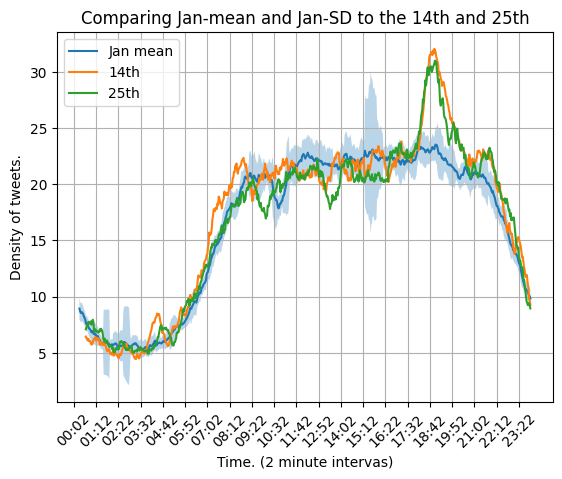

In [59]:
# plot comparing jan, 15th and 25th, with saving to disk.
x = [ elem.strftime("%H:%M") for elem in dutch2minJan.index.tolist()]
d14 = dutch2minJan['2022-01-14 00:00:00']
d25 = dutch2minJan['2022-01-25 00:00:00']
meanRoll= dutch2minJan['mean_roll']
SdRoll =dutch2minJan['std_roll']


figComp = plt.figure()
figCompAX = figComp.add_subplot(1,1,1)
plt.plot(x, meanRoll, label='Jan mean')
plt.fill_between(x, meanRoll-(2*SdRoll),meanRoll+(2*SdRoll),alpha=.3 )
plt.plot(x, d14.rolling(20).mean(), label='14th')
plt.plot(x, d25.rolling(20).mean(), label='25th')

plt.title("Comparing Jan-mean and Jan-SD to the 14th and 25th")
plt.xlabel("Time. (2 minute intervas)")
plt.ylabel("Density of tweets.")
plt.xticks(x[::35], rotation=45)
plt.grid()
plt.legend(loc='best')

figComp.savefig('/home/james/Maths/dataWrangling23/DWproject/figures/figNLComp.jpeg')


In [ ]:
# Process jan 22 for lang='nl' and  time='2min', 14th 15th.
fileNL='/home/james/Maths/dataWrangling23/DWproject/dataSets/jan22NL.csv'
dutchTweets14 = []
t= ['2022-01-14', '2022-01-15', '2022-01-24','2022-01-26']
dutchTweets14 =getBounded(fileNL,'nl','2min',t[0],t[1])

([<matplotlib.axis.XTick at 0x7feefb14e050>,
 [Text(718.0, 0, '00:02'),
  Text(39.0, 0, '01:22'),
  Text(79.0, 0, '02:42'),
  Text(119.0, 0, '04:02'),
  Text(159.0, 0, '05:22'),
  Text(199.0, 0, '06:42'),
  Text(239.0, 0, '08:02'),
  Text(279.0, 0, '09:22'),
  Text(319.0, 0, '10:42'),
  Text(359.0, 0, '12:02'),
  Text(399.0, 0, '13:22'),
  Text(439.0, 0, '14:42'),
  Text(479.0, 0, '16:02'),
  Text(519.0, 0, '17:22'),
  Text(559.0, 0, '18:42'),
  Text(599.0, 0, '20:02'),
  Text(639.0, 0, '21:22'),
  Text(679.0, 0, '22:42')])

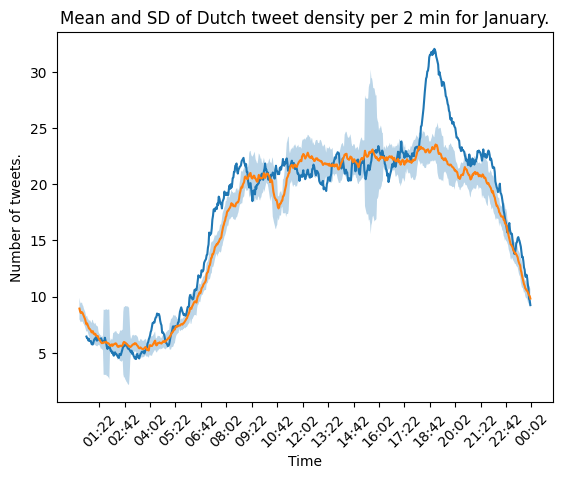

In [74]:
#test. 
plotRollMeanSD =plt.figure()
plt.plot(x[1:], dutchTweets14[dutchTweets14['x']>0].rolling(20).mean(), label='rolling mean.')
plt.plot(x, dd1['mean_roll'], label='rolling mean.')
plt.fill_between(x,dd1['mean_roll']-(2*dd1['std_roll']),dd1['mean_roll']+(2*dd1['std_roll']),alpha=.3)
plt.title("Mean and SD of Dutch tweet density per 2 min for January.")
plt.xlabel("Time")
plt.ylabel("Number of tweets.")
plt.xticks(x[::40], rotation=45)
